## Assignment 1

**Submission deadlines:** 
- get at least **2** points by Tuesday, 9.03.2021
- remaining points: last lab session before or on Tuesday, 16.03.2021

**Points:** Aim to get 8 out of 12 possible points

## Submission instructions
The class is held remotely. To sumbmit your solutions please show the notebook over the video call. Make sure you know all the questions and asnwers, and that the notebook contains results (before presentation do `Runtime -> Restar and run all`)

We provide starter code, however you are not required to use it as long as you properly solve the tasks.

As always, please submit corrections using GitHub's Pull Requests to https://github.com/janchorowski/dl_uwr.

# Task description

## TLDR
Implement and train a neural network using pure numpy.


## Problem 1 [2p]
Implement a two-layer network, manually set weights and biases to solve the XOR task.

A two-layer neural network implementes a function $f: \mathbb{R}^D \rightarrow \mathbb{R}^O$ where $D$ is the input dimensionality and $O$ is the output dinemsionality. The output goes through an intermediate representation (the hidden layer) with dimensionality $H$. 

The computations are as follows:
\begin{equation}
\begin{split}
A_1 &= x W_1^T + b_1  & \qquad\text{Total input to neurons in the hidden layer (network's first layer)} \\
O_1 &= \sigma_1(A_1)  & \qquad\text{Output of the hidden layer} \\
A_2 &= O_1 W_2^T + b_2 & \qquad\text{Total input to neurons in the output layer (network's second layer)}\\
O_2 &= \sigma_2(A_2) & \qquad\text{Output of the network}
\end{split}
\end{equation}

Where $W$ are weight matrices, $b$ are bias vectors, $\sigma$ are non-linear activation functions (e.g. the logistic sigmoid applied element-wise, or softmax).

For the 2D xor problem the network will:
- have 2 inputs, 2 hidden neurons, one output
- use the logistic sigmoid everywhere (that way we, when hand-designig the weights, we can assume that neurons' outputs are binary).

Therrefore the shapes of the data floing through the network will be:
- input: $x\in\mathbb{}R^{2}$
- hidden layer parameters: $W_1\in\mathbb{}R^{2\times 2}$ and $b_1\in\mathbb{}R^{2}$
- representations in the hidden layer: $A_1\in\mathbb{}R^{2}$ and $O_1\in\mathbb{}R^{2}$
- output layer parameters: $W_2\in\mathbb{}R^{1\times 2}$ and $b_1\in\mathbb{}R^{1}$
- representations in the output layer: $A_2\in\mathbb{}R^{1}$ and $O_2\in\mathbb{}R^{1}$

The network can be seen as a logistic regression model, prefixed by a nonlinear transformation of the data.

The first tasks consists of:
- implementing the network
- selecting parametwrs ($W_1, b_1, W_2, b_2$) such that $f(x)\approx XOR(x_1, x_2)$ where the approximation is die to the sigmoids - the output may be close to 0 or 1, but doesn't need to saturate at 0 or 1.

NB: the convention on weight matrix shapes follows linear [layers in PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).


## Problem 2 [2p]
1. Add a backward pass.
2. Use a sensible random initialization for weights and biases.
3. Numerically check the correctness of your gradient computation.

There is nice article about taking derivative over vectors and vector chain rule: https://explained.ai/matrix-calculus/ if someone don't have experience with suchr calculus.


## Problem 3 [2p]
1. Implement gradient descent
2. Train your network to solve 3D XOR
3. Try several hidden layer sizes, for each size record the fracton of successful trainings. Then answer:
    - What is the minimal hidden size required to solve 3D XOR (even with low reliability, when the training has to be repeated multiple times)
    - What is the minimal hidden size required to reliably solve 3D XOR
    - Which networks are easier to train - small or large ones? Why?


## Problem 4 [1p]
Replace the first nonlinearity with the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. Find a network architecture which reliably learns the 3D XOR problem.


## Problem 5 [1p]
Add a second hidden layer to your network, implement the forward and backward pass, then demonstrate training.


## Problem 6 [2p]
Implement a way to have a _variable number_ of hidden layers. Check how deep sigmoid or ReLU networks you  can train. For simplicity you can assume that all hidden layers have the same number of neurons, and use the same activation function.


## Problem 7 [2p]
For each weight matrix $w\in\mathbb{R}^{n\times m}$, add a randomly initialized `backward weight` $w_b\in\mathbb{R}^{m\times n}$, which will not change during training. Change the backward pass to use $w_b$ instead of $w^T$, getting an approxmatoin of the true gradient. Can you get your network to train?

NB: this approach, dubbed [feedback alignment](https://www.nature.com/articles/ncomms13276), was proposed to make error backpropagation more biologically plausible, by providing a solution to the "weight transport problem". Regular backpropagation requires that neurons not only know their incoming weights (thet they control), but also their outgoing weights (that are controlled by neurons in the upper layers). This is nearly impossible in a real brain.

# Solutions and starter code

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

XOR dataset creation

(-0.05, 1.05, -0.05, 1.05)

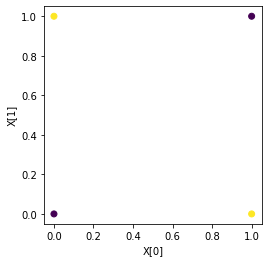

In [ ]:
# Let's define a XOR dataset

# X will be matrix of N 2-dimensional inputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1],], dtype=np.float32)
# Y is a matrix of N numners - answers
Y = np.array([[0], [1], [1], [0],], dtype=np.float32)

plt.scatter(
    X[:, 0], X[:, 1], c=Y[:, 0],
)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.axis("square")

## Problem 1

The code below contains a mock-up of a two-layer neural network. Fill in the code and manually set weights to solve the XOR problem.

Please note: the shapes are set to be compatible with PyTorch's conventions:
* a batch containing $N$ $D$-dimensional examples has shape $N\times D$ (each example is a row!)
* a weight matrix in a linear layer with $I$ inputs and $O$ outputs has shape $O \times I$
* a bias vector is a 1D vector. Please note that [broadcasting rules](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) allow us to think about it as a $1 \times D$ matrix.

In [ ]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

def _delsigmoid(x):
 
    return x * (1 - x)


class SmallNet:
    def __init__(self, in_features, num_hidden, dtype=np.float32):
        self.W1 = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden,), dtype=dtype)
        self.W2 = np.zeros((1, num_hidden), dtype=dtype)
        self.b2 = np.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        # TODO for Problem 2:
        # set all parameters to small random values, e.g. from N(0, 0.5)
        self.W1 = np.random.uniform(low=0, high=0.5, size=(self.W1.shape))
        # print(self.W1, "init_params")
        self.b1 = np.random.uniform(low=0, high=0.5, size=(self.b1.shape))
        self.W2 = np.random.uniform(low=0, high=0.5, size=(self.W2.shape))
        self.b2 = np.random.uniform(low=0, high=0.5, size=(self.b2.shape))



    def forward(self, X, Y=None, do_backward=False):
        # TODO Problem 1: Fill in details of forward propagation

        # Input to neurons in 1st layer x W_1^T + b_1
        # print(X, "X")
        # print(self.W1.T, "W1.T")
        # A1 = np.add(np.dot(X, self.W1.T), self.b1) 
        A1 = np.dot(X, self.W1.T) + self.b1
        # print(A1, "A1")
        # print(A1)
        # Outputs after the sigmoid non-linearity
        O1 = sigmoid(A1)
        # print(O1.shape)
        # Inputs to neuron in the second layer
        # A_2 &= O_1 W_2^T + b_2 
        # print(self.W2.T, "SELF.W.T")
        A2 = np.add(np.dot(O1, self.W2.T), self.b2)  
        # print(A2, "A2")
        # Outputs after the sigmoid non-linearity
        # O_2 &= \sigma_2(A_2)
        O2 = sigmoid(A2)
     
        # print("Most important thing O2",O2)
        


        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:   
            loss = -Y * np.log(O2) - (1 - Y) * np.log(1.0 - O2)
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
            # print(loss)
        else:
            loss = np.nan

        if do_backward:
            
            A2_grad = O2 - Y
            # print(A2_grad, "Wynik ostatniej aktywacji - dokładna wartosc")       
            self.b2_grad = A2_grad.sum(0) / A2.shape[0]
            self.W2_grad = np.dot(A2_grad.T, O1) / A2.shape[0]
            O1_grad = np.dot(A2_grad, self.W2)
            A1_grad = O1_grad * _delsigmoid(O1)
            self.b1_grad = A1_grad.sum(0) / A2.shape[0]
            self.W1_grad = A1_grad.T @ X /A2.shape[0]

        return O2, loss

In [ ]:
# TODO Problem 1:
# Set by hand the weight values to solve the XOR problem

net = SmallNet(2, 2, dtype=np.float64)
net.W1 = np.array([[10,-100],[10, -90]], dtype=np.float64)
net.b1 = np.array([-10,90], dtype=np.float64)
net.W2 = np.array([20, -15],dtype=np.float64)
net.b2 = np.array(10,dtype=np.float64)
# # Hint: since we use the logistic sigmoid activation, the weights may need to
# # be fairly large

predictions, loss = net.forward(X, Y, do_backward=False)

for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p}")

XORnet([0. 0.]) = 0.006698889780762399
XORnet([0. 1.]) = 0.9241418199787566
XORnet([1. 0.]) = 0.9933071490757153
XORnet([1. 1.]) = 0.006697379559455959


## Problem 2

In [ ]:
def check_grad(net, param_name, X, Y, eps=1e-5):
    """A gradient checking routine"""

    param = getattr(net, param_name)
    param_flat_accessor = param.reshape(-1)


    grad = np.empty_like(param)
    grad_flat_accessor = grad.reshape(-1)


    net.forward(X, Y, do_backward=True)
    orig_grad = getattr(net, param_name + "_grad")
    # print(orig_grad)

    assert param.shape == orig_grad.shape

    for i in range(param_flat_accessor.shape[0]):
        orig_val = param_flat_accessor[i]
        param_flat_accessor[i] = orig_val + eps
        _, loss_positive = net.forward(X, Y)
        param_flat_accessor[i] = orig_val - eps
        _, loss_negative = net.forward(X, Y)
        param_flat_accessor[i] = orig_val
        grad_flat_accessor[i] = (loss_positive - loss_negative) / (2 * eps)
    assert np.allclose(grad, orig_grad)
    return grad, orig_grad

In [ ]:
# Hint: use float64 for checking the correctness of the gradient
net = SmallNet(2, 2, dtype=np.float64)

for param_name in ["W1", "b1", "W2", "b2"]:
    check_grad(net, param_name, X, Y)

## Problem 3

In [ ]:
net = SmallNet(2, 10, dtype=np.float64)

# Od alphy = 2 w góre różnice są minimalne 
alpha = 2  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X, Y, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2"]:
        param = getattr(net, param_name)
        # print(param)
        # Hint: use the construct `param[:]` to change the contents of the array!
        # Doing instead `param = new_val` simply changes to what the variable
        # param points to, without affecting the network!
        # alternatively, you could do setattr(net, param_name, new_value)
        param[:] = param - alpha * getattr(net, param_name + "_grad")

after 0 steps 	loss=1.2120571624234557
after 5000 steps 	loss=0.0007366242865105278
after 10000 steps 	loss=0.00032390922586611655
after 15000 steps 	loss=0.00020413815928333866
after 20000 steps 	loss=0.00014790265395153677
after 25000 steps 	loss=0.00011544522770083843
after 30000 steps 	loss=9.439025382038474e-05
after 35000 steps 	loss=7.966012677835609e-05
after 40000 steps 	loss=6.879430140045229e-05
after 45000 steps 	loss=6.0458320464431694e-05
after 50000 steps 	loss=5.386684965827468e-05
after 55000 steps 	loss=4.8528083426517614e-05
after 60000 steps 	loss=4.4118585690352066e-05
after 65000 steps 	loss=4.041705962741935e-05
after 70000 steps 	loss=3.72670600360252e-05
after 75000 steps 	loss=3.4554907527504346e-05
after 80000 steps 	loss=3.219604076226376e-05
after 85000 steps 	loss=3.0126274369969225e-05
after 90000 steps 	loss=2.8296023605569686e-05
after 95000 steps 	loss=2.6666385188148696e-05


In [ ]:
predictions, loss = net.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet([0. 0.]) = 3.4456465715732075e-05
XORnet([0. 1.]) = 0.9999762248621572
XORnet([1. 0.]) = 0.99997609490811
XORnet([1. 1.]) = 1.868762556965595e-05


In [ ]:
# TODO:
# Generate data for a 3D XOR task
# Then estimate the success rate of training the network with diferent
# hidden sizes.
# Y is a matrix of N numners - answers
X3 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [1, 1, 0], [1, 0, 1], [0, 1, 1], [1, 1, 1]], dtype=np.float32)
Y3 =  np.array([[0], [1], [1], [1], [0], [0], [0], [1]], dtype=np.float32)
# [2, 3, 5, 10, 20]
for hidden_dim in [2, 3, 5, 10, 20]:
    # TODO: run a fe trainings and record the fraction of successful ones
    net = SmallNet(3, hidden_dim, dtype=np.float32)
    alpha = 3  # set a learning rate
    prev_loss = 1
    for i in range(100000):
        _, loss = net.forward(X3, Y3, do_backward=True)
        if i % 5000 == 0:
            print(f"after {i} steps \tloss={loss} neuron size {hidden_dim}")
            print(prev_loss - loss)
            prev_loss = loss
        for param_name in ["W1", "b1", "W2", "b2"]:
            param = getattr(net, param_name)
            # print(param)
            # Hint: use the construct `param[:]` to change the contents of the array!
            # Doing instead `param = new_val` simply changes to what the variable
            # param points to, without affecting the network!
            # alternatively, you could do setattr(net, param_name, new_value)
            param[:] = param - alpha * getattr(net, param_name + "_grad")
        
        
# Wartość pod print'em print(f"after {i} steps \tloss={loss} neuron size {hidden_dim}") 
# oznacza skok dokładnosci 

after 0 steps 	loss=0.75165526851276 neuron size 2
0.24834473148724
after 5000 steps 	loss=0.016361774114557463 neuron size 2
0.7352934943982026
after 10000 steps 	loss=0.0046608631217060215 neuron size 2
0.011700910992851442
after 15000 steps 	loss=0.0028423343917655915 neuron size 2
0.00181852872994043
after 20000 steps 	loss=0.002045672069385124 neuron size 2
0.0007966623223804674
after 25000 steps 	loss=0.00159766404043446 neuron size 2
0.0004480080289506641
after 30000 steps 	loss=0.0013105196785648363 neuron size 2
0.0002871443618696237
after 35000 steps 	loss=0.0011108026443276788 neuron size 2
0.00019971703423715746
after 40000 steps 	loss=0.0009638701325131071 neuron size 2
0.00014693251181457174
after 45000 steps 	loss=0.0008512444735635077 neuron size 2
0.00011262565894959941
after 50000 steps 	loss=0.0007621698644900562 neuron size 2
8.907460907345147e-05
after 55000 steps 	loss=0.0006899605338679415 neuron size 2
7.22093306221147e-05
after 60000 steps 	loss=0.0006302421692


#For Hidden layer with size equal to 2

[[5.00029280e-01]
 [4.99968490e-01]
 [9.99974348e-01]
 [9.99974348e-01]
 [5.00025299e-01]
 [2.29279374e-05]
 [2.29279373e-05]
 [4.99982379e-01]]

after 95000 steps 	loss=0.34661166374270724  


Mimumum size to solve it but unreliably

#For Hidden layer with size equal to 3


[[7.74432386e-05]
 [9.99946786e-01]
 [9.99998127e-01]
 [9.99947160e-01]
 [5.98847338e-05]
 [1.52125907e-06]
 [5.91541861e-05]
 [9.99937405e-01]]
after 95000 steps 	loss=4.606710834326667e-05

Much better score, and it is the minimum size to solve it reliably

## Problem 4


In [ ]:
def ReLU(x):
    return np.maximum(0, x)
def sigmoid(x):
    return 1/(1+ np.exp(-x))

class SmallNetReLu:
    def __init__(self, in_features, num_hidden, dtype=np.float32):
        self.W1 = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden,), dtype=dtype)
        self.W2 = np.zeros((1, num_hidden), dtype=dtype)
        self.b2 = np.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        # TODO for Problem 2:
        # set all parameters to small random values, e.g. from N(0, 0.5)
        self.W1 = np.random.uniform(low=-0.5, high=0.5, size=(self.W1.shape))
        # print(self.W1, "init_params")
        self.b1 = np.random.uniform(low=-0.5, high=0.5, size=(self.b1.shape))
        self.W2 = np.random.uniform(low=-0.5, high=0.5, size=(self.W2.shape))
        self.b2 = np.random.uniform(low=-0.5, high=0.5, size=(self.b2.shape))



    def forward(self, X, Y=None, do_backward=False):
        # TODO Problem 1: Fill in details of forward propagation

        # Input to neurons in 1st layer x W_1^T + b_1
        A1 = np.dot(X, self.W1.T) + self.b1
        # Outputs after the ReLU non-linearity
        O1 = ReLU(A1)
        A2 = np.add(np.dot(O1, self.W2.T), self.b2)  
        O2 = sigmoid(A2)
             

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:   
            loss = -Y * np.log(O2) - (1 - Y) * np.log(1.0 - O2)
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
            # print(loss)
        else:
            loss = np.nan

        if do_backward:
            
            A2_grad = O2 - Y
            # print(A2_grad, "Wynik ostatniej aktywacji - dokładna wartosc")       
            self.b2_grad = A2_grad.sum(0) / A2.shape[0]
            self.W2_grad = np.dot(A2_grad.T, O1) / A2.shape[0]
            O1_grad = np.dot(A2_grad, self.W2)
            tmp = np.zeros(O1.shape)
            # print(tmp)
            for i, v in enumerate(O1):
               if v[0] > 0 and v[1] > 0:
                    tmp[i] = 1
            # print(tmp)        
            A1_grad = O1_grad * tmp
            self.b1_grad = A1_grad.sum(0) / A2.shape[0]
            self.W1_grad = A1_grad.T @ X /A2.shape[0]

        return O2, loss

In [ ]:
X3 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [1, 1, 0], [1, 0, 1], [0, 1, 1], [1, 1, 1]], dtype=np.float32)
Y3 =  np.array([[0], [1], [1], [1], [0], [0], [0], [1]], dtype=np.float32)
# [2, 3, 5, 10, 20]
for hidden_dim in [2, 3, 5, 10, 20, 50, 100]:
    # TODO: run a fe trainings and record the fraction of successful ones
    net = SmallNetReLu(3, hidden_dim, dtype=np.float32)
    asd, loss = net.forward(X3, Y3, do_backward=True)
    alpha = 1 # set a learning rate
    for i in range(100000):
        asd, loss = net.forward(X3, Y3, do_backward=True)
        if (i == 95000):
            print(f"after {i} steps \tloss={loss}", "Number of hidden layer {}".format(hidden_dim))
        for param_name in ["W1", "b1", "W2", "b2"]:
            param = getattr(net, param_name)
            # print(param)
            # Hint: use the construct `param[:]` to change the contents of the array!
            # Doing instead `param = new_val` simply changes to what the variable
            # param points to, without affecting the network!
            # alternatively, you could do setattr(net, param_name, new_value)
            param[:] = param - alpha * getattr(net, param_name + "_grad")

after 95000 steps 	loss=0.602833100512351 Number of hidden layer 2
after 95000 steps 	loss=0.5973930458686108 Number of hidden layer 3
after 95000 steps 	loss=0.49856099883844673 Number of hidden layer 5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in multiply


after 95000 steps 	loss=4.818412813521675 Number of hidden layer 10
after 95000 steps 	loss=0.0039963902429707605 Number of hidden layer 20
after 95000 steps 	loss=0.3206669600378373 Number of hidden layer 50
after 95000 steps 	loss=0.000739878676224315 Number of hidden layer 100


## Problem 5

In [ ]:
def ReLU(x):
    return np.maximum(0, x)
def sigmoid(x):
    return 1/(1+ np.exp(-x))

class SmallNetReLu1:
    def __init__(self, in_features, num_hidden, dtype=np.float32):
        self.W1 = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden,), dtype=dtype)
        self.W2 = np.zeros((num_hidden, num_hidden), dtype=dtype)
        self.b2 = np.zeros((num_hidden,), dtype=dtype)
        self.W3 = np.zeros((1, num_hidden), dtype=dtype)
        self.b3 = np.zeros((1,), dtype=dtype)

        self.init_params()

    def init_params(self):
        # TODO for Problem 2:
        # set all parameters to small random values, e.g. from N(0, 0.5)
        self.W1 = np.random.uniform(low=-0.1, high=0.5, size=(self.W1.shape))
        # print(self.W1, "init_params")
        self.b1 = np.random.uniform(low=-0.1, high=0.5, size=(self.b1.shape))
        self.W2 = np.random.uniform(low=-0.1, high=0.5, size=(self.W2.shape))
        self.b2 = np.random.uniform(low=-0.1, high=0.5, size=(self.b2.shape))
        self.W3 = np.random.uniform(low=-0.1, high=0.5, size=(self.W3.shape))
        self.b3 = np.random.uniform(low=-0.1, high=0.5, size=(self.b3.shape))



    def forward(self, X, Y=None, do_backward=False):
        

        # Input to neurons in 1st layer x W_1^T + b_1
        A1 = np.dot(X, self.W1.T) + self.b1
        O1 = ReLU(A1)
        A2 = np.dot(O1, self.W2.T) + self.b2
        O2 = ReLU(A2)

        A3 = np.add(np.dot(O2, self.W3.T), self.b3)  
        O3 = sigmoid(A3)
             

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = -Y * np.log(O2) - (1 - Y) * np.log(1.0 - O2)
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
            # print(loss)
        else:
            loss = np.nan

        if do_backward:

            A3_grad = O3 - Y   
            self.b3_grad = A3_grad.sum(0) / A3.shape[0]
            self.W3_grad = np.dot(A3_grad.T, O2) / A3.shape[0]
            
            O2_grad = np.dot(A3_grad, self.W3)
            tmp = np.zeros(O2_grad.shape)
            for i, v in enumerate(O2):
               if v[0] > 0 and v[1] > 0:
                    tmp[i] = 1
         
            A2_grad = O2_grad * tmp

            self.b2_grad = A2_grad.sum(0) / A3.shape[0]
            self.W2_grad = np.dot(A2_grad.T, O1)/ A3.shape[0]
     
            O1_grad = np.dot(A2_grad, self.W2)
            
            tmp = np.zeros(O1_grad.shape)
           
            for i, v in enumerate(O1):
               if v[0] > 0 and v[1] > 0:
                    tmp[i] = 1
          
           
            A1_grad = O1_grad * tmp
        
            self.b1_grad = A1_grad.sum(0) / A3.shape[0]
            self.W1_grad = A1_grad.T @ X /A3.shape[0]
            # print(self.W1_grad.shape)
            # print(self.W1.shape)
            # print(self.b1_grad.shape)
            # print(self.b1.shape)

        return O3, loss

In [ ]:
X3 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [1, 1, 0], [1, 0, 1], [0, 1, 1], [1, 1, 1]], dtype=np.float32)
Y3 =  np.array([[0], [1], [1], [1], [0], [0], [0], [1]], dtype=np.float32)
[2, 3, 5, 10, 20]


for hidden_dim in [2, 3, 5, 10, 20, 50]:
    # TODO: run a fe trainings and record the fraction of successful ones
    net = SmallNetReLu1(3, hidden_dim, dtype=np.float32)
    asd, loss = net.forward(X3, Y3, do_backward=True)

    alpha = 0.1 # set a learning rate
    for i in range(100000):
        asd, loss = net.forward(X3, Y3, do_backward=True)
        if (i == 95000):
            print(f"after {i} steps \tloss={loss}", "Number of hidden layer {}".format(hidden_dim))
            # 
        for param_name in ["W1", "b1", "W2", "b2","W3", "b3"]:
            param = getattr(net, param_name)
            # print(param)
            # Hint: use the construct `param[:]` to change the contents of the array!
            # Doing instead `param = new_val` simply changes to what the variable
            # param points to, without affecting the network!
            # alternatively, you could do setattr(net, param_name, new_value)
            param[:] = param - alpha * getattr(net, param_name + "_grad")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in log


after 95000 steps 	loss=nan Number of hidden layer 2
after 95000 steps 	loss=2.349661319459032 Number of hidden layer 3
after 95000 steps 	loss=nan Number of hidden layer 5
after 95000 steps 	loss=nan Number of hidden layer 10
after 95000 steps 	loss=nan Number of hidden layer 20
after 95000 steps 	loss=nan Number of hidden layer 50


loss = nan but predictions are good

[[0.24678714]
 [0.74523735]
 [0.25004536]
 [0.75844653]
 [0.24644634]
 [0.74992847]
 [0.25672116]
 [0.74638765]]
after 95000 steps 	loss=nan Number of hidden layer 2
[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]
after 95000 steps 	loss=2.2526904739320024 Number of hidden layer 3
[[2.34022960e-04]
 [9.99085103e-01]
 [9.97676367e-01]
 [9.99500093e-01]
 [1.74984040e-04]
 [1.04891670e-04]
 [6.75124794e-03]
 [9.93633863e-01]]
after 95000 steps 	loss=nan Number of hidden layer 5
[[0.5002551 ]
 [0.50413557]
 [0.49793582]
 [0.49770025]
 [0.50410883]
 [0.49790908]
 [0.49767352]
 [0.50028183]]
after 95000 steps 	loss=nan Number of hidden layer 10
[[0.03408587]
 [0.96478616]
 [0.98654236]
 [0.95334973]
 [0.03673089]
 [0.06375009]
 [0.00471075]
 [0.95636956]]
after 95000 steps 	loss=nan Number of hidden layer 20
[[5.45075188e-02]
 [9.88872384e-01]
 [9.74969044e-01]
 [9.67603044e-01]
 [5.07355789e-04]
 [1.38797318e-02]
 [1.09668318e-02]
 [9.90580234e-01]]
after 95000 steps 	loss=nan Number of hidden layer 50

## Problem 6

## Problem 7